# Test Sigmoid, Tanh, Relu Activations Functions On MNIST Dataset

## Contents

1. Neural Networks Module
2. Make some data
3. Define model, and Train the model
4. Analyze results

In [1]:
# import libraries

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(2020)

## 1. Neural Networks Module

In [2]:
# Build a model with sigmoid function

class NetSigmoid(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(NetSigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [3]:
# Build a model with tanh function

class NetTanh(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [4]:
# Build a model with relu function

class NetRelu(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [21]:
# Define the function to train the model

def train(model, criterion, train_loader, valid_loader, optimizer, epochs=100):
    
    i = 0
    useful_staff = {'training_loss': [], 'validating_accuracy': []}
    # Loop
    for epoch in range(epochs):
        # Training
        for i, (x, y) in enumerate(train_loader):
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            useful_staff['training_loss'].append(loss.item())
        
        # Validating
        correct = 0
        for x, y in valid_loader:
            z = model(x.view(-1, 28 * 28))
            _, yhat = torch.max(z, 1)
            correct += (y == yhat).sum().item()
        accuracy = 100 * (correct/len(valid_dataset))
        useful_staff['validating_accuracy'].append(accuracy)
        
    return useful_staff

## 2. Make some data

In [9]:
# Create train_dataset

train_dataset = dsets.MNIST(root='./data/', train=True, download=True, transform=transforms.ToTensor())

In [10]:
# Create valid_dataset

valid_dataset = dsets.MNIST(root='./data/', train=False, download=True, transform=transforms.ToTensor())

In [11]:
# Create dataloader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=5000, shuffle=True)

## 3. Define model, and Train the model

In [12]:
# Create the criterion funciton

criterion = nn.CrossEntropyLoss()

In [17]:
# define D_in, H, D_out

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10
learning_rate = 0.01

In [22]:
# Create the model with sigmoid function 

sigmoid_model = NetSigmoid(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(sigmoid_model.parameters(), lr=learning_rate)

# train
training_results_sigmiod = train(sigmoid_model, criterion, train_loader, valid_loader, optimizer, epochs=30)

In [23]:
# Create the model with tanh function

tanh_model = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(tanh_model.parameters(), lr=learning_rate)

# train
training_results_tanh = train(tanh_model, criterion, train_loader, valid_loader, optimizer, epochs=30)

In [24]:
# Create the model with relu function

relu_model = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(relu_model.parameters(), lr=learning_rate)

# train
# train
training_results_relu = train(relu_model, criterion, train_loader, valid_loader, optimizer, epochs=30)

## 4. Analyze the results

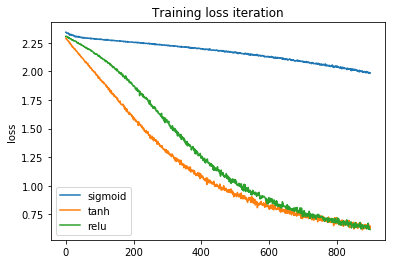

In [28]:
# Compare the training loss

plt.plot(training_results_sigmiod['training_loss'], label='sigmoid')
plt.plot(training_results_tanh['training_loss'], label='tanh')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.title('Training loss iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

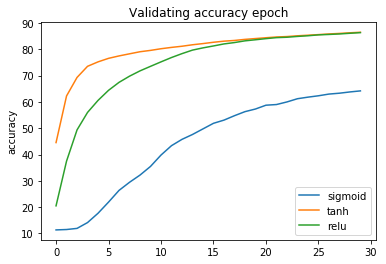

In [31]:
# Compare the validating accuracy

plt.plot(training_results_sigmiod['validating_accuracy'], label='sigmoid')
plt.plot(training_results_tanh['validating_accuracy'], label='tanh')
plt.plot(training_results_relu['validating_accuracy'], label='relu')
plt.title('Validating accuracy epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()